In [16]:
import numpy as np
import pandas as pd
import humap
import time

import matplotlib.pyplot as plt
import math
import os

from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_openml

In [23]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# X = np.load('./../data/MNIST_70000.npy')
# y = np.load('./../data/MNIST_70000_label.npy').astype(int)
# X = normalize(X)


print(X.shape, y.shape)

(70000, 784) (70000,)


In [28]:
hUmap = humap.HUMAP(np.array([0.2, 0.2]), n_neighbors=50)
hUmap.fit(X, y)

In [29]:
X_2 = X[hUmap.original_indices(2), :]
X_1 = X[hUmap.original_indices(1), :]


# Using 'transform' method to project a hierarchy level

In [30]:
"""
    Projecting the top-level (2)
"""
embedding_2 = hUmap.transform(2)
y_2 = hUmap.labels(2)

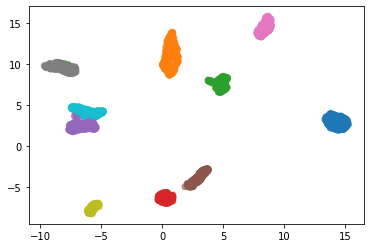

In [31]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.6, cmap='tab10')
plt.show()

In [32]:
embedding_1 = hUmap.transform(1)
y_1 = hUmap.labels(1)
embedding_1.shape

(14000, 2)

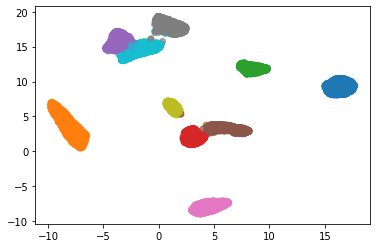

In [33]:
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], c=y_1, alpha=0.7, cmap='tab10')
plt.show()

In [34]:
embedding_0 = hUmap.transform(0)
y_0 = y.astype(int)
embedding_0.shape

(70000, 2)

In [38]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

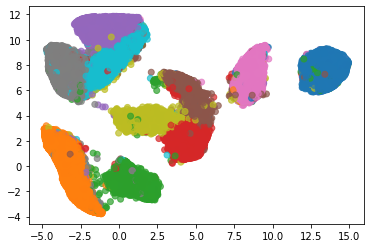

In [39]:
plt.scatter(embedding_0[:, 0], embedding_0[:, 1], c=y_0.astype(int), alpha=0.7, cmap='tab10')
# plt.savefig('figs/'+dataset+'-humap-level0.png')
plt.show()

# Using 'transform' method to project a subset of indices

I will use a clustering to discover indices more easily

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(embedding_2)
kmeans.labels_


array([0, 1, 0, ..., 4, 4, 5])

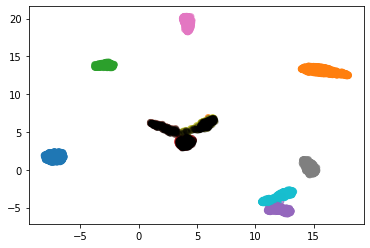

In [12]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.7, cmap='tab10')

indices_black = np.arange(embedding_2.shape[0])[kmeans.labels_ == 0]

plt.scatter(embedding_2[indices_black, 0], embedding_2[indices_black, 1], c='black', alpha=0.2)



In [13]:
"""
    Use transform method, however, make sure to specify indices=
"""

embedding_cluster1, y_cluster1, indices_cluster1 = hUmap.transform(2, indices=indices_black)
X_cluster1 = X_1[indices_cluster1]



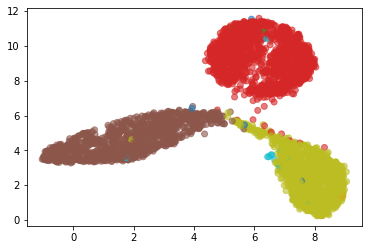

In [14]:
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1], c=y_cluster1, alpha=0.6, cmap='tab10')
plt.show()

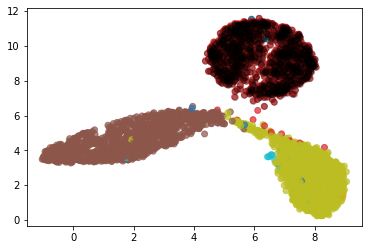

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(embedding_cluster1)
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1], c=y_cluster1, alpha=0.7, cmap='tab10')

indices_black = np.arange(embedding_cluster1.shape[0])[kmeans.labels_ == 1]

plt.scatter(embedding_cluster1[indices_black, 0], embedding_cluster1[indices_black, 1], c='black', alpha=0.2)

In [16]:
"""
    Do the same as in the previous example
    
    Here (and for possibly subsequent levels), we have to indices = indices_clusterLevel[indices_black]
    
"""
embedding_cluster2, y_cluster2, indices_cluster2 = hUmap.transform(1, indices=indices_cluster1[indices_black])
X_cluster2 = X[indices_cluster2]



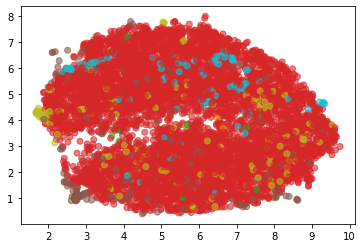

In [17]:
plt.scatter(embedding_cluster2[:, 0], embedding_cluster2[:, 1], c=y_cluster2, alpha=0.6,cmap='tab10')

# Using 'transform' method for projecting based on class

In [18]:
"""
    Make sure to set indices=, and class_based=True
"""

embedding_cluster, y_cluster, indices_cluster = hUmap.transform(2, indices=np.array([4, 9]), class_based=True)
X_cluster = X_1[indices_cluster]

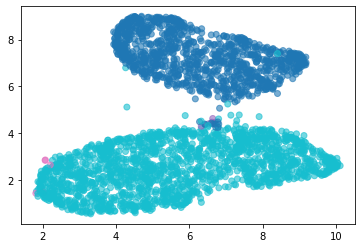

In [19]:
plt.scatter(embedding_cluster[:, 0], embedding_cluster[:, 1], c=y_cluster, alpha=0.6, cmap='tab10')
plt.show()


In [20]:
embedding_cluster0, y_cluster0, indices_cluster0 = hUmap.transform(1, indices=np.array([4, 9]), class_based=True)
X_cluster0 = X[indices_cluster0]
yy = y[indices_cluster0]

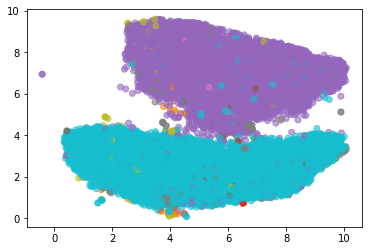

In [21]:
plt.scatter(embedding_cluster0[:, 0], embedding_cluster0[:, 1], c=yy, alpha=0.6, cmap='tab10')
plt.show()

In [22]:
count = np.zeros(10).astype(int)
for c in y_cluster0:
    count[c] += 1

In [23]:
for i in range(count.shape[0]):
    print("%d -> %d" % (i, count[i]))

0 -> 2
1 -> 53
2 -> 17
3 -> 48
4 -> 6697
5 -> 57
6 -> 4
7 -> 321
8 -> 91
9 -> 6680


In [24]:
count = np.zeros(10).astype(int)
for c in y_cluster:
    count[c] += 1

In [25]:
for i in range(count.shape[0]):
    print("%d -> %d" % (i, count[i]))

0 -> 0
1 -> 0
2 -> 0
3 -> 0
4 -> 1039
5 -> 0
6 -> 6
7 -> 5
8 -> 0
9 -> 1703
